# Car Prediction



##Importación de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df = pd.read_csv('https://raw.githubusercontent.com/JotaLeutgeb/proyectofinalDS1/main/Car_Prediction/car_price_prediction.csv')


## Entendiendo los datos


In [2]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


Nombres, cantidad y tipos de valores en columnas.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Ninguna fila con datos nulos.

In [5]:
for col in df.columns:
    print(f"columna {col} : {df[col].nunique()}")
    print("****"*9)

columna ID : 18924
************************************
columna Price : 2315
************************************
columna Levy : 559
************************************
columna Manufacturer : 65
************************************
columna Model : 1590
************************************
columna Prod. year : 54
************************************
columna Category : 11
************************************
columna Leather interior : 2
************************************
columna Fuel type : 7
************************************
columna Engine volume : 107
************************************
columna Mileage : 7687
************************************
columna Cylinders : 13
************************************
columna Gear box type : 4
************************************
columna Drive wheels : 3
************************************
columna Doors : 3
************************************
columna Wheel : 2
************************************
columna Color : 16
*************************

In [6]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

## Análisis exploratorio y Limpieza de datos

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


No se identificaron outliers


###Organización y cambios preliminares en columnas

In [8]:
df.rename(columns={'Prod. year': 'Prod year'}, inplace=True)

In [9]:
df.columns = [col.replace(' ', '_') for col in df.columns]

In [10]:
df.columns.tolist()

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod_year',
 'Category',
 'Leather_interior',
 'Fuel_type',
 'Engine_volume',
 'Mileage',
 'Cylinders',
 'Gear_box_type',
 'Drive_wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

***Columnas normalizadas y organizadas ✅***

##Limpieza

###Limpieza general del *DataFrame*

In [11]:
df.duplicated().sum()

313

In [12]:
df.drop_duplicates(inplace=True)

Filas duplicadas eliminadas ✅

In [13]:
df = df.drop(['ID'],axis=1)

Eliminación de la columna `'ID'`, ya que tenemos una por defecto

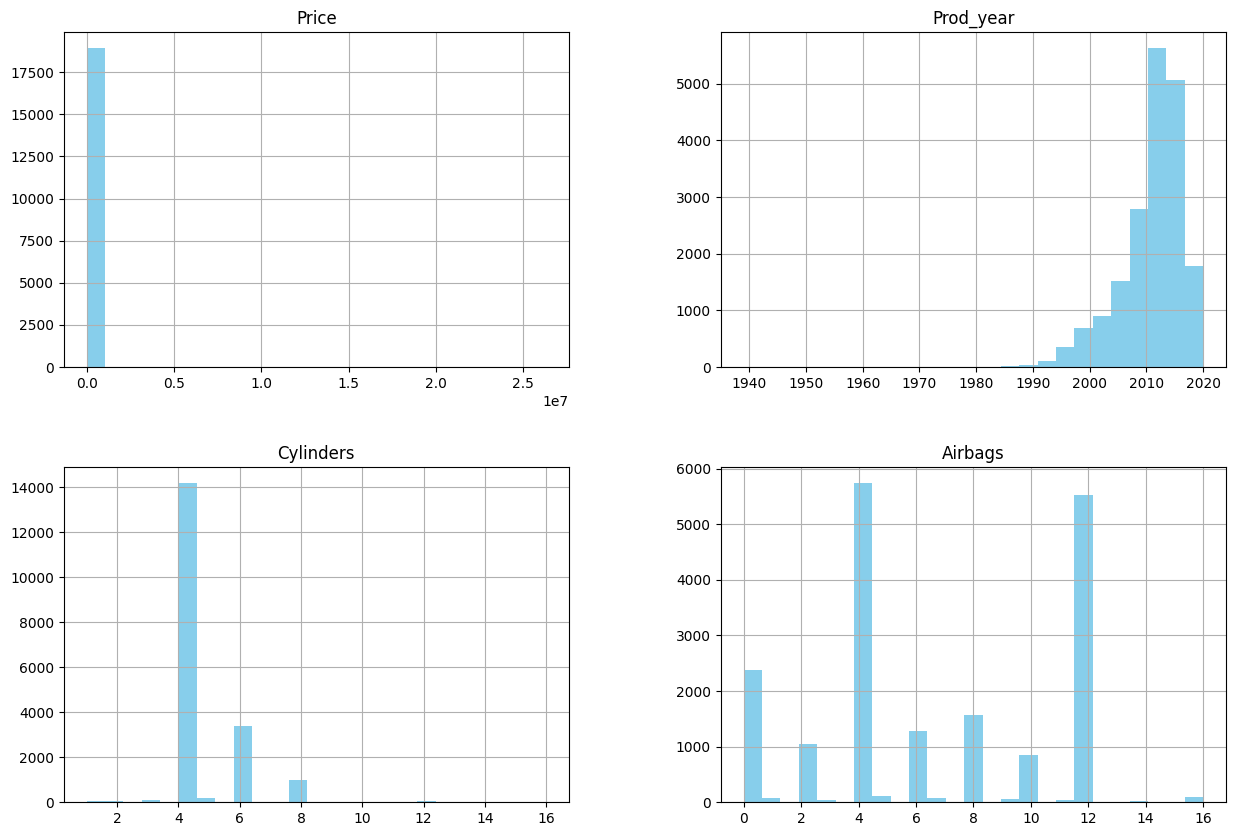

In [14]:
df.hist(bins=25,figsize=(15,10),color='skyblue')
plt.show()

### Limpieza `'Levy'`

In [15]:
df['Levy'].value_counts()

-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [16]:
df['Levy'] = df['Levy'].replace('-',pd.NA)
df["Levy"]=df["Levy"].fillna(df["Levy"].median())
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')

df['Levy'].head(10)

0    1399.0
1    1018.0
2     781.0
3     862.0
4     446.0
5     891.0
6     761.0
7     751.0
8     394.0
9     781.0
Name: Levy, dtype: float64

Reemplazo de "-" por la media del resto de valores en `'Levy'` para tener solo ints en la columna.

***Limpieza `'Levy'` ✅***

###Limpieza `'Engine_volume'`

In [17]:
df['Engine_volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [18]:
#Engine_Volume no debería ser objeto, eliminación de "Turbo"
df['Engine_volume'] = df['Engine_volume'].str.replace('Turbo',"")

In [19]:
df['Engine_volume'] = df['Engine_volume'].astype('float64')
df['Engine_volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine_volume, Length: 18924, dtype: float64

***Limpieza `Engine_Volume` ✅***

###Limpieza `'Mileage'`

In [20]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [21]:
# Mileage no debería ser un objeto, eliminación de "km"
df['Mileage'] = df['Mileage'].str.replace('km',"")

In [22]:
df['Mileage'] = df['Mileage'].astype('int')

***Limpieza `Mileage`✅***



###Limpieza `'Cylinders'`

In [23]:
# los datos no deberían ser float, sino int
df['Cylinders'] = df['Cylinders'].astype(int)
df['Cylinders']

0        6
1        6
2        4
3        4
4        4
        ..
19232    4
19233    4
19234    4
19235    4
19236    4
Name: Cylinders, Length: 18924, dtype: int64

### Limpieza `'Airbags'`

Se encontró un error en los airbags, hay veces en la que indica 0 y eso no necesariamente está bien ya que los airbgas fueron reglamentarios a partir de 1998.

---

Aquellos valores que sean 0 a partir de ese año(Fecha en la que se volvieron obligatorios en USA), se reemplazarán por 2, que es el mínimo: (conductor y pasajero).

---

Probablemente queden airbags == 0, pero no serán valores erróneos sino correctos.

In [24]:
df[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998)]['Airbags'].count()

2222

In [25]:
df.loc[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998), 'Airbags'] = 2


In [26]:
df[(df['Airbags'] == 0) & (df['Prod_year'] >= 1998)]['Airbags'].count()

0

***Limpieza `'Airbags'` ✅***

### Limpieza `'Doors'`

In [27]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

Como se puede ver, la columna doors tiene 1 valor numérico, y seguido un mes.

In [28]:
def reemplazar_doors(valor):
  # Hay solo 3 valores en el dataframe: ['04-May', '02-Mar', '>5']
    if valor == '04-May':
        return '4-5'
    elif valor == '02-Mar':
        return '2-3'
    else:
        return valor # Si no aplican los condicionales anteriores, se mantiene el '>5'

In [29]:
df['Doors'] = df['Doors'].astype(str)
df['Doors'] = df['Doors'].apply(reemplazar_doors)
df['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 18924, dtype: object

In [30]:
df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

***Limpieza `'Doors'`✅***

###Limpieza `'Price'`

Analizando el precio se pueden ver valores menores a 1000, que parece un número demasiado bajo para el análisis.

In [31]:
df[df['Price'] < 500]

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
27,30,781.0,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,169000,4,Automatic,Front,4-5,Left wheel,White,8
33,125,1750.0,TOYOTA,Highlander,2008,Sedan,Yes,Hybrid,3.3,287274,6,Automatic,4x4,4-5,Left wheel,White,12
39,314,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,382746,6,Automatic,4x4,4-5,Left wheel,Silver,12
45,220,1194.0,TOYOTA,Tacoma,2013,Jeep,Yes,Petrol,4.0,239342,6,Automatic,4x4,4-5,Left wheel,Silver,12
53,392,1017.0,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2.0,1600,4,Automatic,Rear,4-5,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,831.0,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635,4,Automatic,Front,4-5,Left wheel,Black,12
19218,30,781.0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4,Automatic,Front,4-5,Right-hand drive,Green,9
19229,50,781.0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4,Automatic,Front,4-5,Left wheel,Silver,6
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4,Automatic,Front,4-5,Left wheel,Silver,12


Eliminamos todos los valores <= 500 ya se consideraron como valores erróneos

In [32]:
df = df[df['Price'] >= 500]

In [33]:
#Verificación si se eliminó correctamente
df[df['Price'] < 500]['Price'].count()


0

***Limpieza `'Price'`✅***

## Búsqueda de outliers

###Identificación outliers

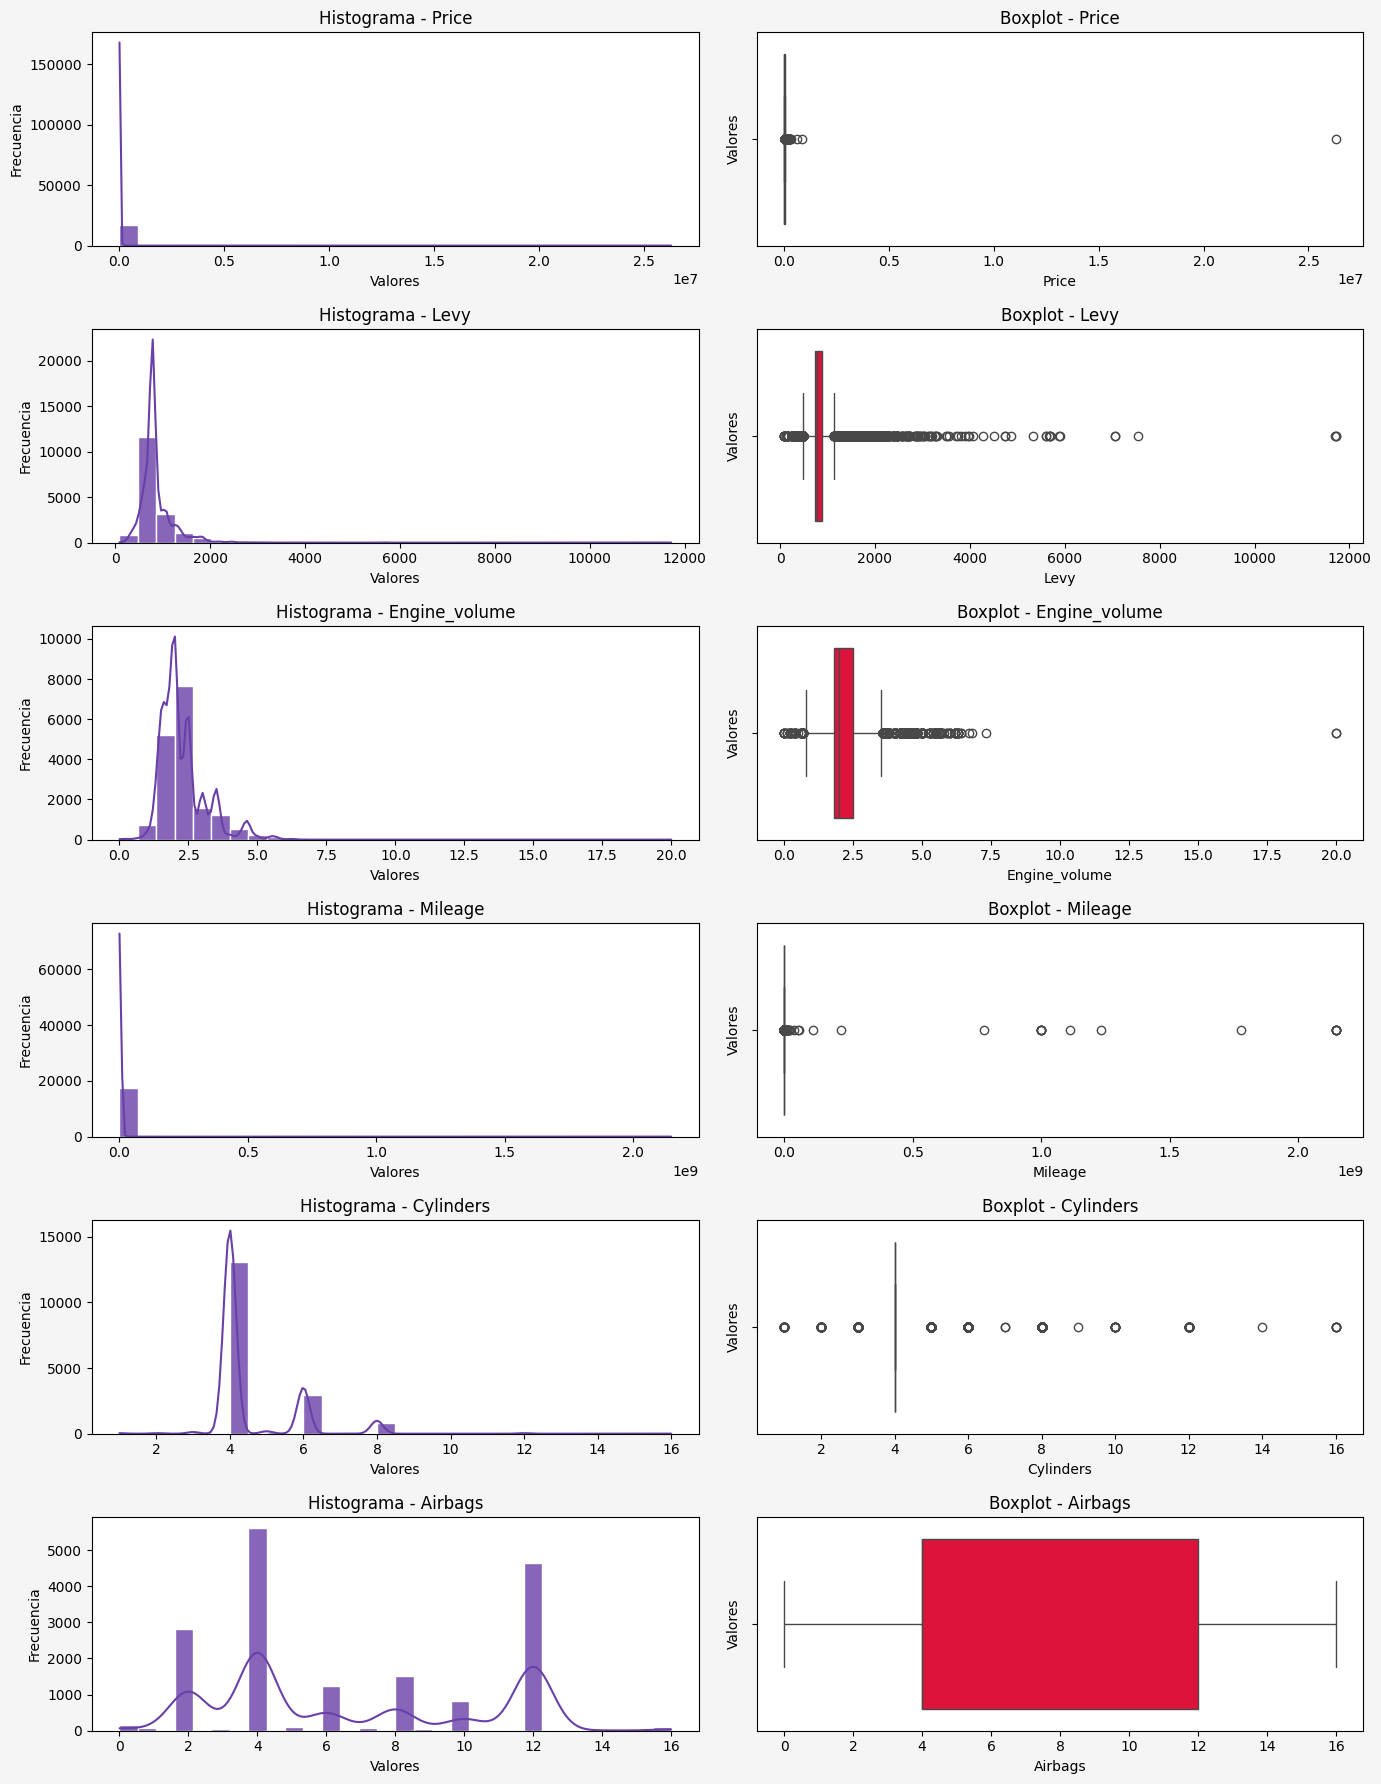

In [34]:
columnas_seleccionadas = ['Price', 'Levy','Engine_volume', 'Mileage','Cylinders', 'Airbags']

# Prepara una grilla de subplots con un gris claro
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18), facecolor='whitesmoke')
sns.set_theme(style='darkgrid')
# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas): #Enumerate permite iterar en una lista, returneando una tupla que contiene el índice de cada elemento y el elemento mismo.
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')

# Ajuste de espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

Viendo estos gráficos, se puede ver que hay muchísimos outliners

Habiendo limpiado los datos, el único que parece estar correcto es `'Airbag'`, por lo tanto, vamos a eliminar los valores atípicos en el resto de columnas

###Eliminación Outliers

Para la identificación de los outliers, voy a utilizar un méotodo llamado IQR o en español RIQ.


---


*El rango intercuartílico (RIC) es una medida de dispersión estadística que se utiliza para evaluar la variabilidad en el rango intermedio de un conjunto de datos, excluyendo los valores atípicos o extremos. *

---
El primer cuartil (Q1) es el valor que deja atrás al 25% más bajo de los datos, el segundo cuartil (Q2) es equivalente a la mediana y el tercer cuartil (Q3) es el valor que deja atrás al 75% más bajo de los datos.

Pasospara calcular el RIC:
1.   Determinar el RIC retandole q1 a q3
2.   Definir el límite inferior y superior
  -  límite inferior: Q1-1.5*RIC
  - Límite superior: Q3+1.5*RIC
3. Identificar valores atípicos:
- Cuaqluier dato sobre o debajo de los límites marcados, es considerado un potencial dato atípico.




In [35]:
#Lista de columnas a verificar sus outliers
columnas = ['Levy', 'Engine_volume', 'Mileage','Price']


# Dicionario para contar los outliers
outliers = {}

def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definiendo el límite de los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Encontrar y contar los outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    contar_outliers = outliers.shape[0]

    # Eliminación de outliers del dataframe
    df_limpia = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    return df_limpia, contar_outliers

# Iteración de la función en cada columna y almacenamiento de los resultados
for columna in columnas:
    df, contar_outliers = eliminar_outliers(df, columna)
    outliers[columna] = contar_outliers

# Impresión de los resultados
print("Outlier Counts:")
for columna, cant in outliers.items():
    print(f"{columna}: {cant}")

Outlier Counts:
Levy: 3147
Engine_volume: 487
Mileage: 530
Price: 754


Ahora que hemos eliminado los outliners, se puede ver una gran mejoría respecto a los valores atípicos en las variables anteriormente afectadas_

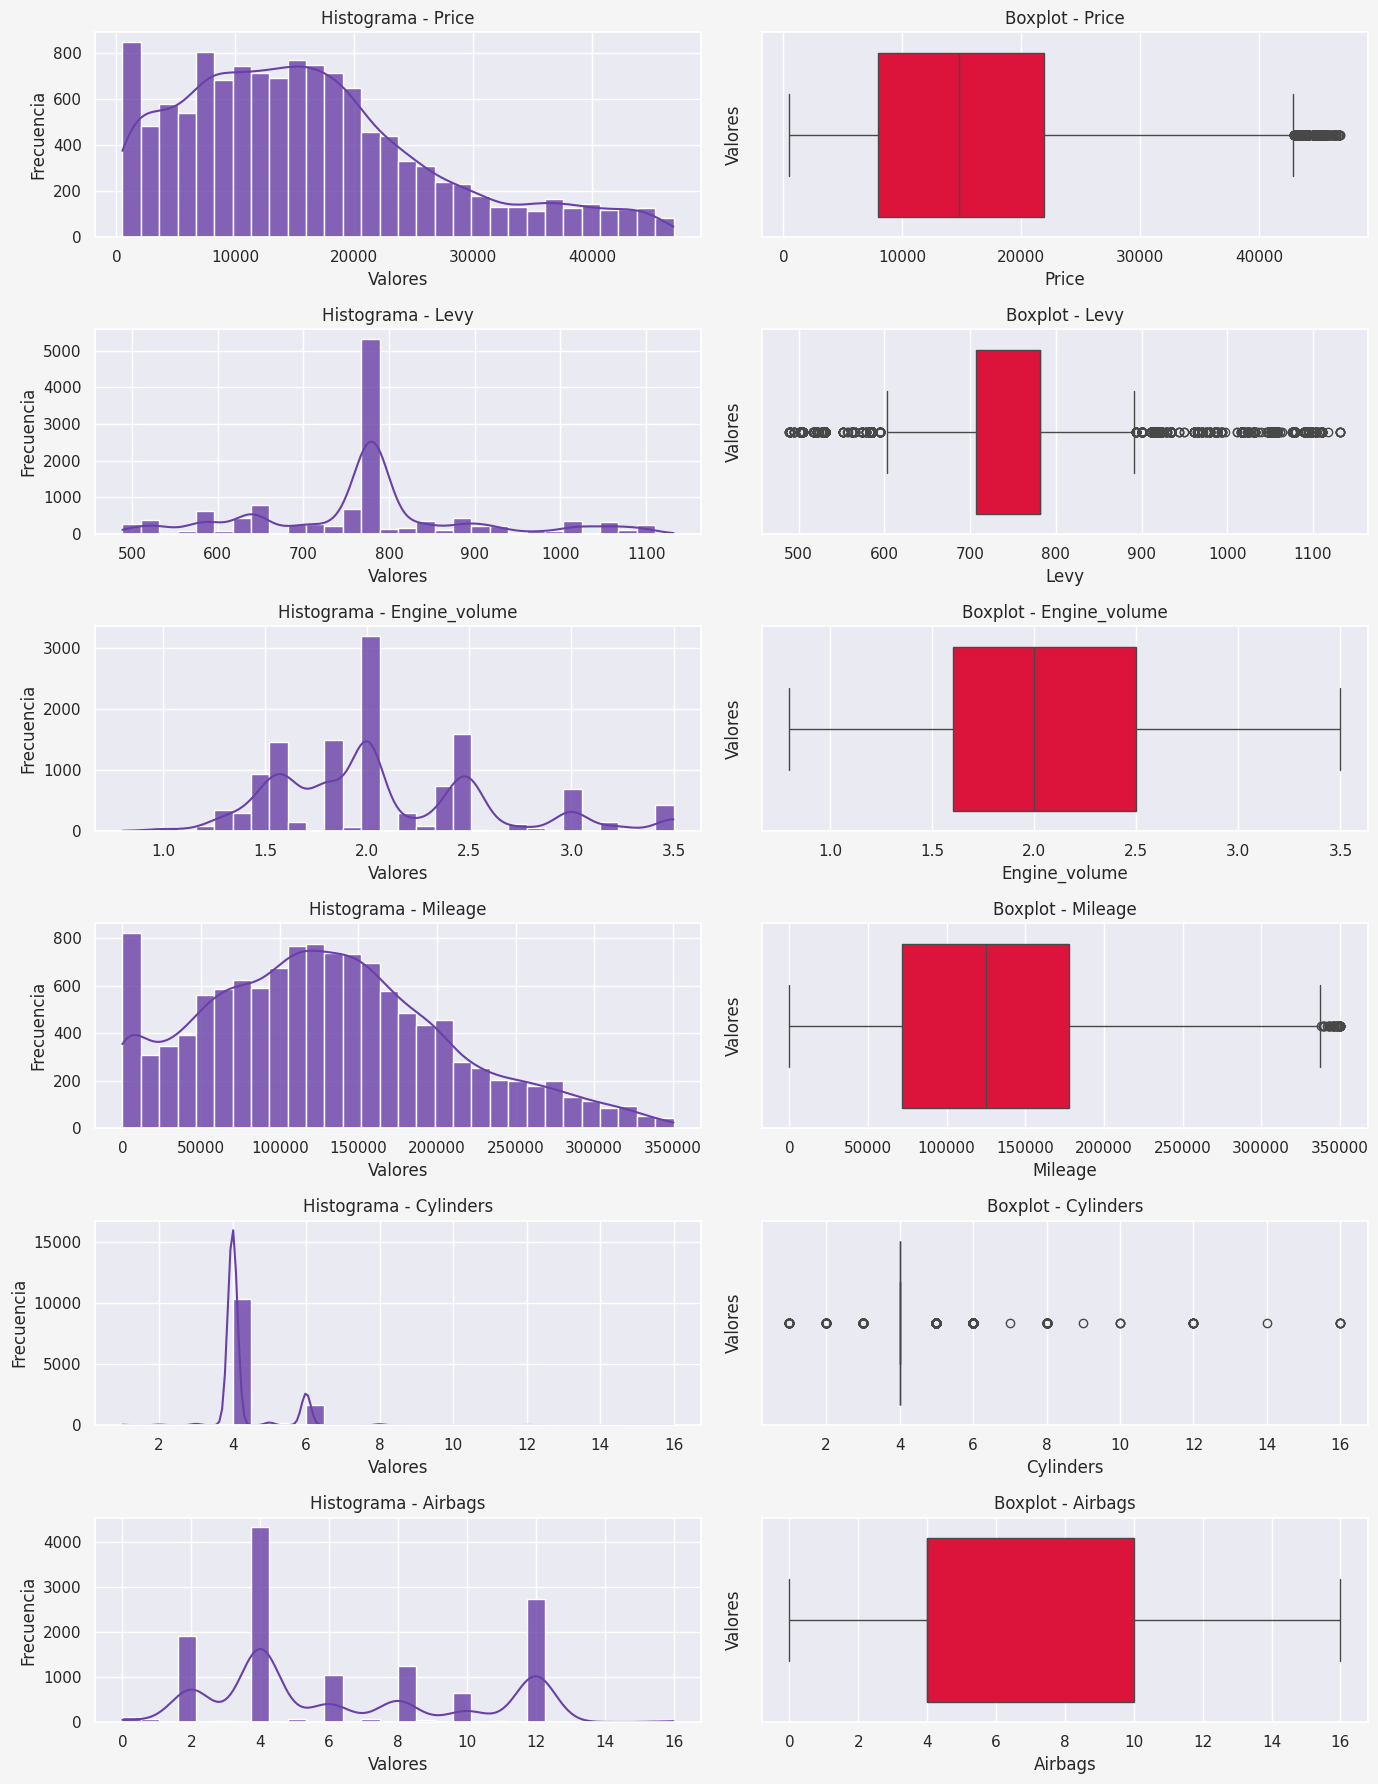

In [36]:
columnas_seleccionadas = ['Price', 'Levy','Engine_volume', 'Mileage','Cylinders', 'Airbags']

# Prepara una grilla de subplots con un gris claro
sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 18), facecolor='whitesmoke')

# Itera a través de las columnas seleccionadas y hace histogramas y boxplots
for i, columna in enumerate(columnas_seleccionadas):
    # Histograma
    sns.histplot(df[columna], bins=30, color='#6940A8', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')

    # Boxplot
    sns.boxplot(x=df[columna], ax=axes[i, 1], color='crimson', boxprops=dict(facecolor='crimson'))
    axes[i, 1].set_title(f'Boxplot - {columna}')
    axes[i, 1].set_ylabel('Valores')

# Ajuste de espacio
plt.tight_layout()

# Muestra el gráfico
plt.show()

##Análisis de columnas categóricas e ingeniería de factores (Feature engineering)

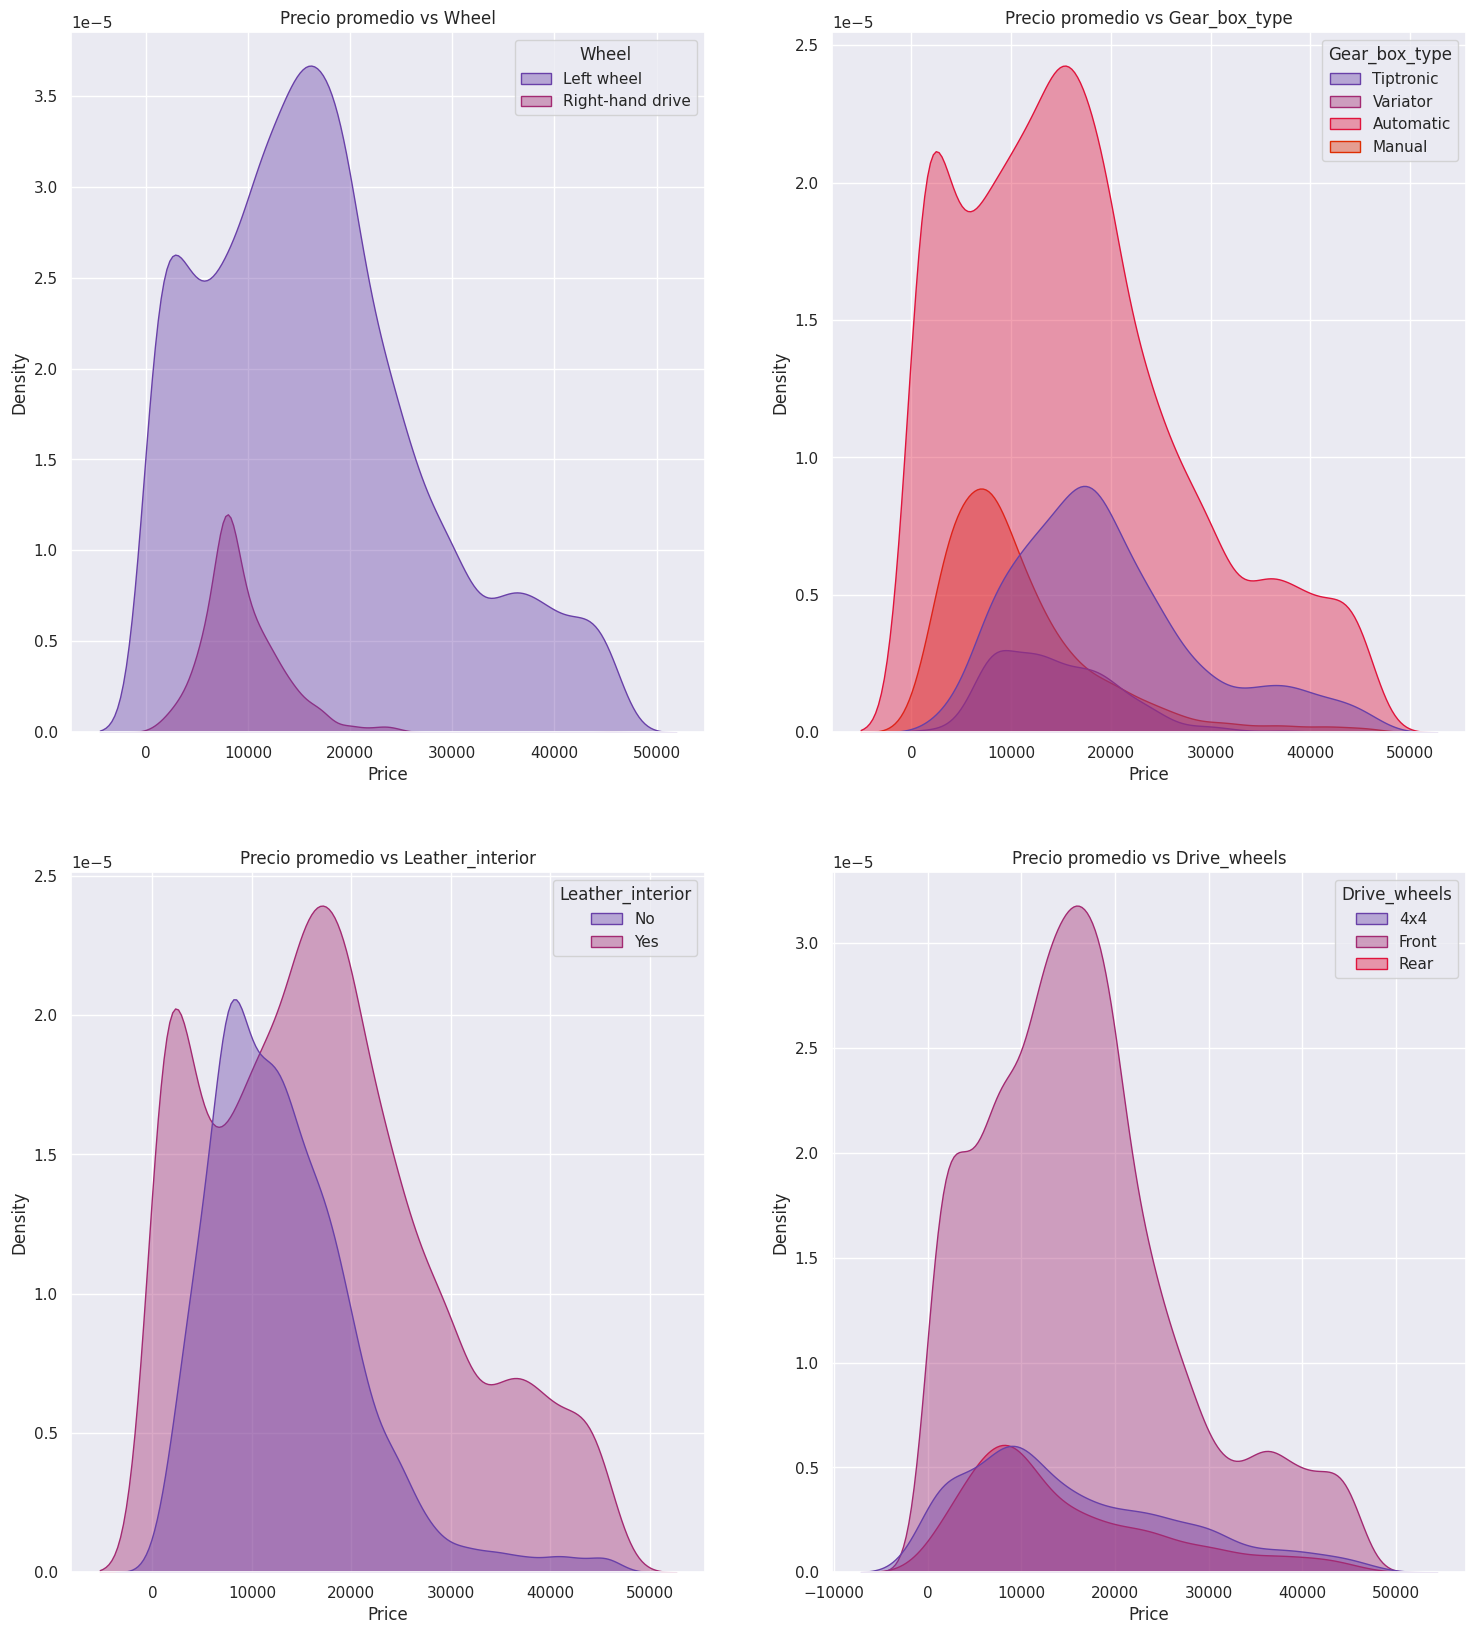

In [37]:
columnas_a_graficar_kde = ['Wheel', 'Gear_box_type', 'Leather_interior', 'Drive_wheels']
fig, ejes = plt.subplots(nrows=2, ncols=2, figsize=(18, 20))

#Hacemos nuestra propia paleta
paleta = sns.color_palette(['#6940A8', '#A32A72', '#e0143c','#de2e03', '#9c2772'])

#Ignoramos las advertencias por tener una paleta de colores muy larga/corta
warnings.filterwarnings("ignore", message="The palette list has more values*", category=UserWarning)
warnings.filterwarnings("ignore", message="np.find_common_type is deprecated*", category=DeprecationWarning)

# Flateneamos para simplificación de visualización
ejes = ejes.flatten()

for i, columna in enumerate(columnas_a_graficar_kde):
    # Ordena los datos por el precio promedio en orden descendente
    datos_organizados = df.groupby(columna)['Price'].mean().sort_values(ascending=False).index

    sns.kdeplot(data=df, x='Price', hue=columna, ax=ejes[i], fill=True,palette=paleta,common_norm=True,alpha=0.4)
    ejes[i].set_title(f'Precio promedio vs {columna}')
warnings.resetwarnings()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


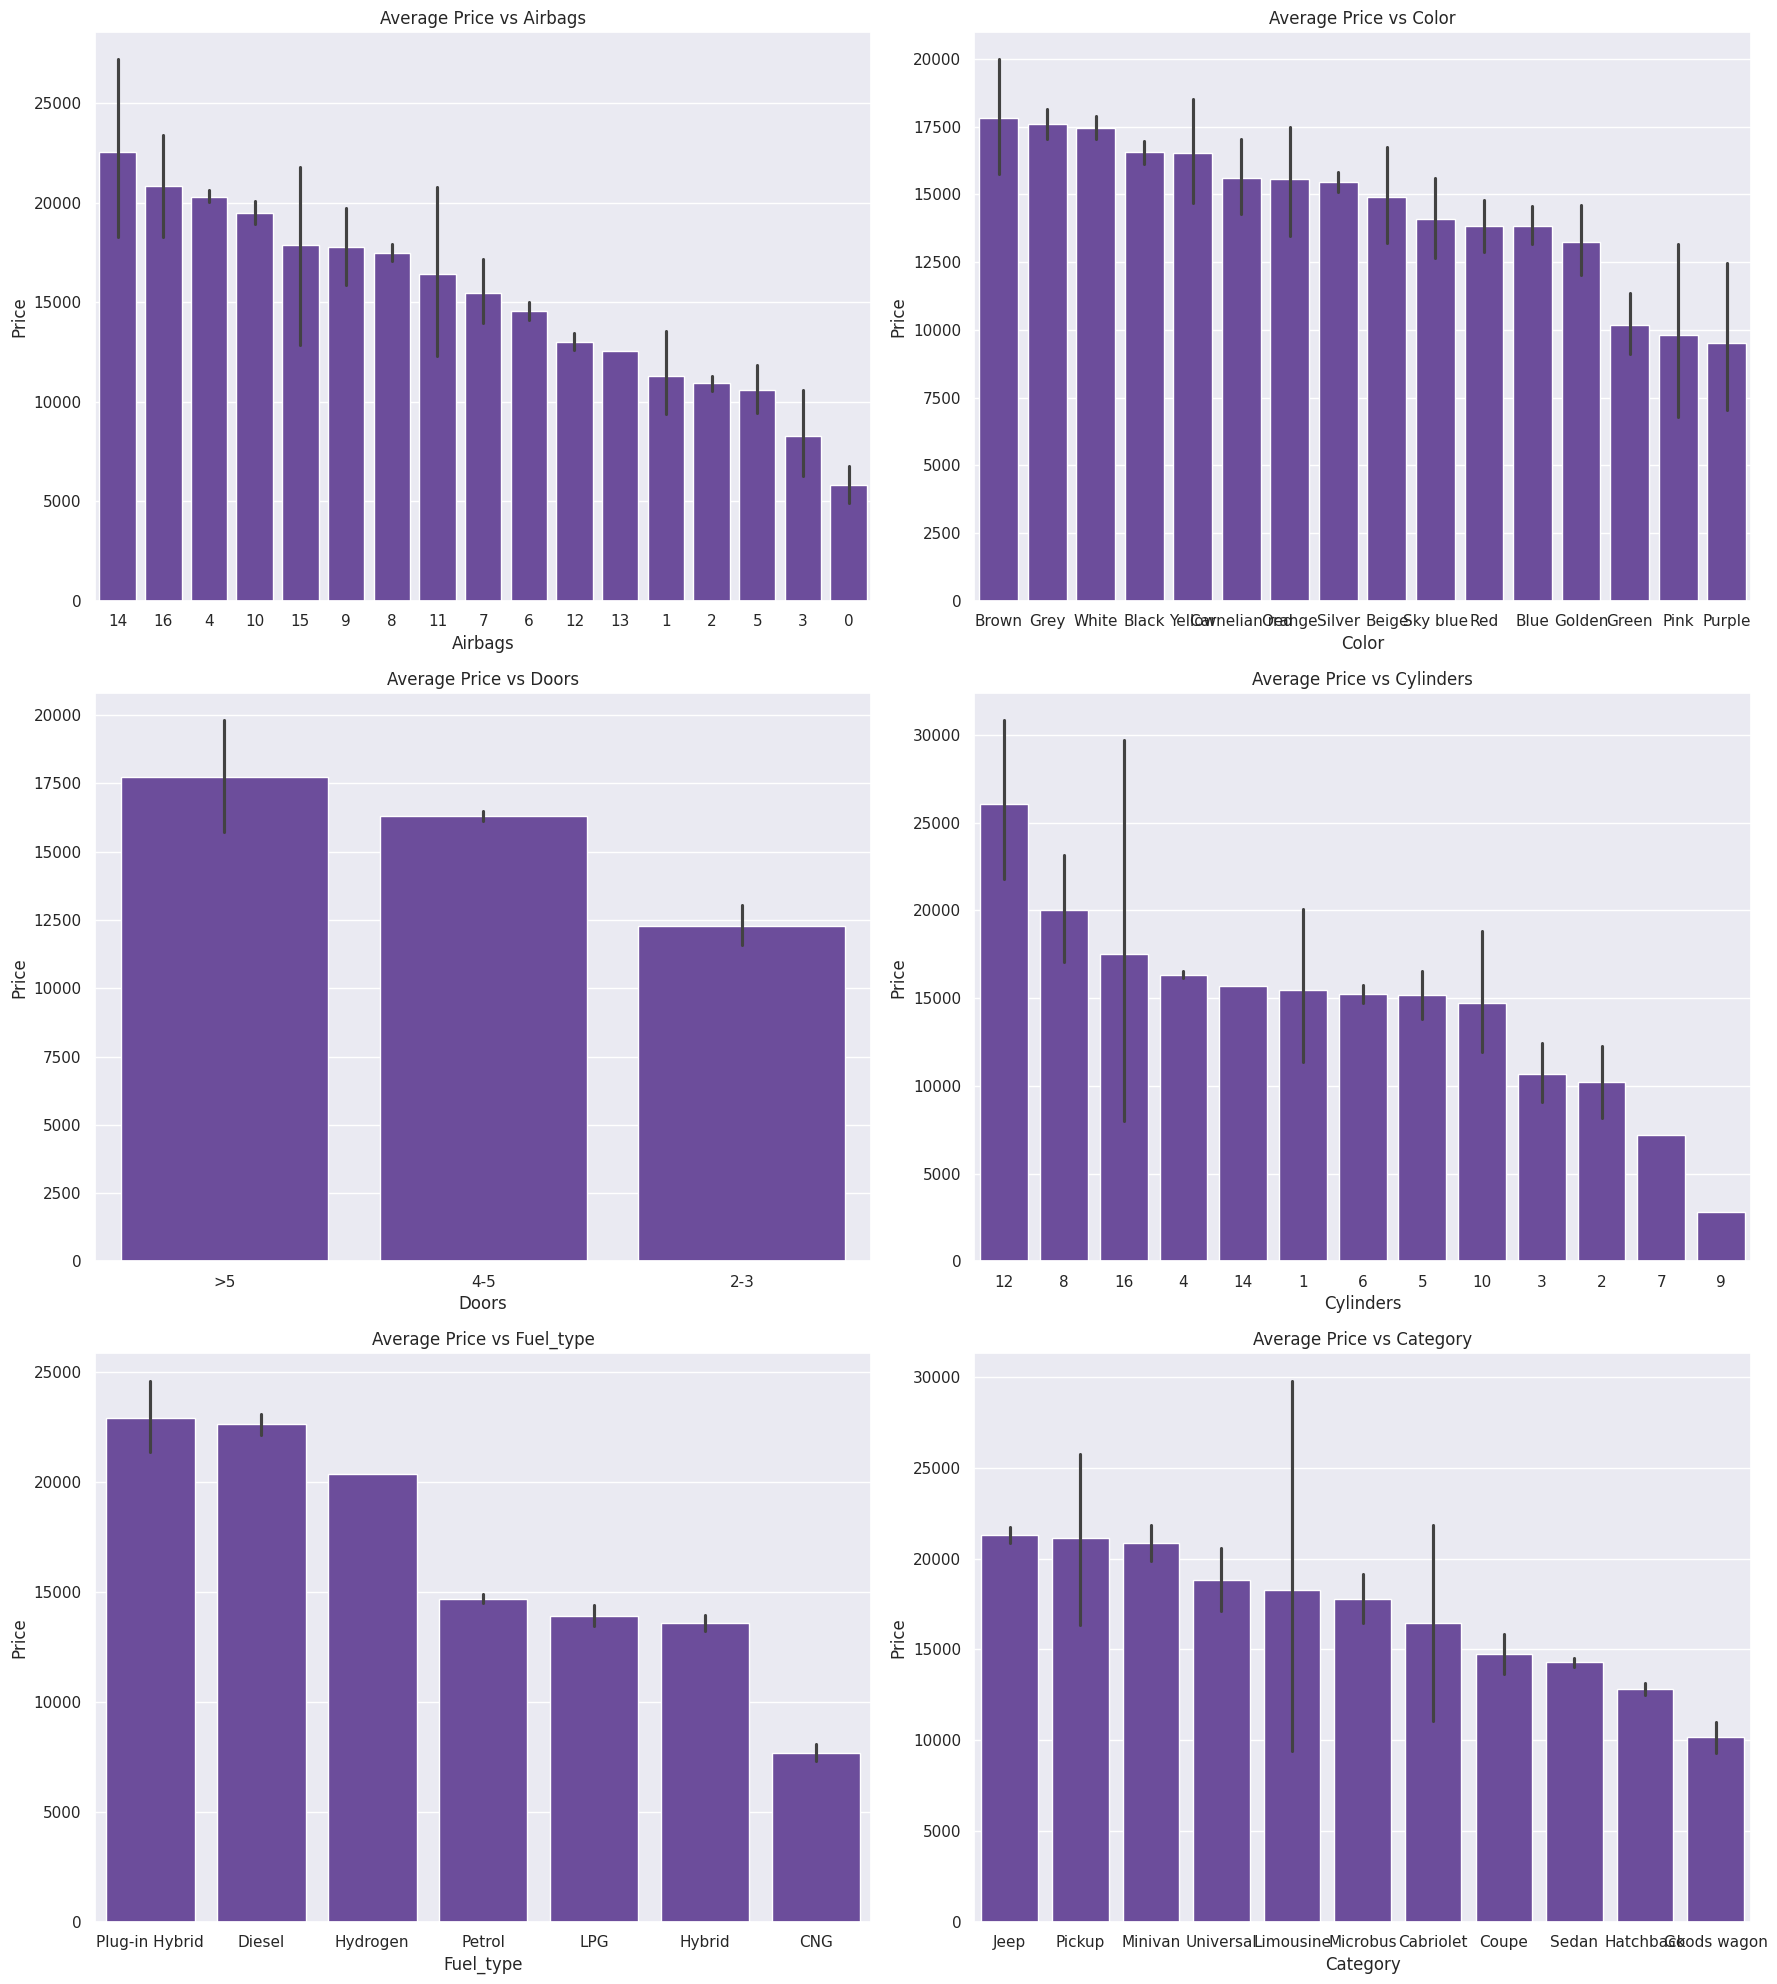

In [38]:
#Ignoramos las advertencias por tener una paleta de colores muy larga/corta
warnings.filterwarnings("ignore", message="np.find_common_type is deprecated*", category=DeprecationWarning)

# Lista de columnas a graficar
columnas_a_graficar_barra = ['Airbags', 'Color', 'Doors', 'Cylinders', 'Fuel_type', 'Category']
sns.set_theme(style='darkgrid')

# Creación de grilla subplot 5x2
fig, ejes = plt.subplots(nrows=3, ncols=2, figsize=(18, 20))

# Flattenear los ejes para simplificar la visualización
ejes = ejes.flatten()

# Itera sobre las columnas y genera gráficos de barras
for i, columna in enumerate(columnas_a_graficar_barra):
    # Ordena los datos por el precio promedio en orden descendente
    datos_organizados = df.groupby(columna)['Price'].mean().sort_values(ascending=False).index
    sns.barplot(x=columna, y='Price', data=df, order=datos_organizados, ax=ejes[i], color='#6940A8')
    ejes[i].set_title(f'Average Price vs {columna}')


# Ajustar presentación
plt.tight_layout()
plt.show()

## Visualizaciones insights

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


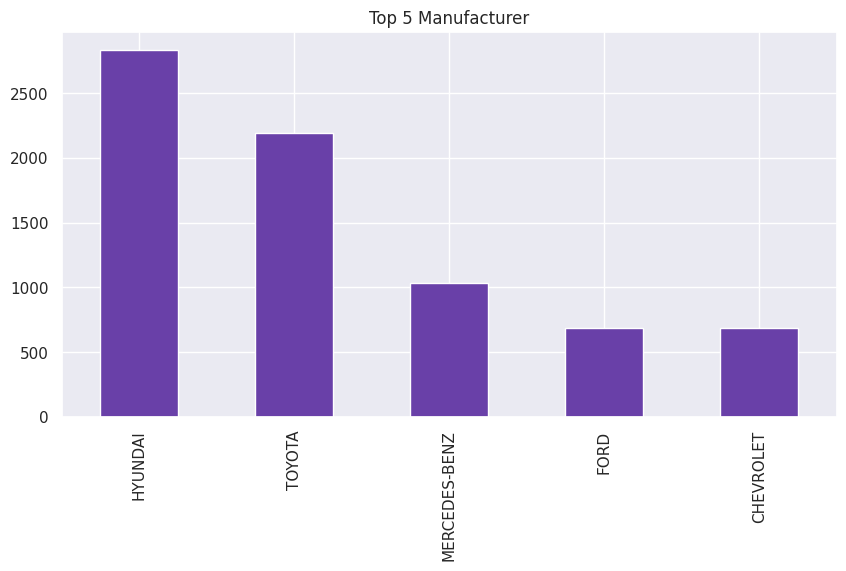

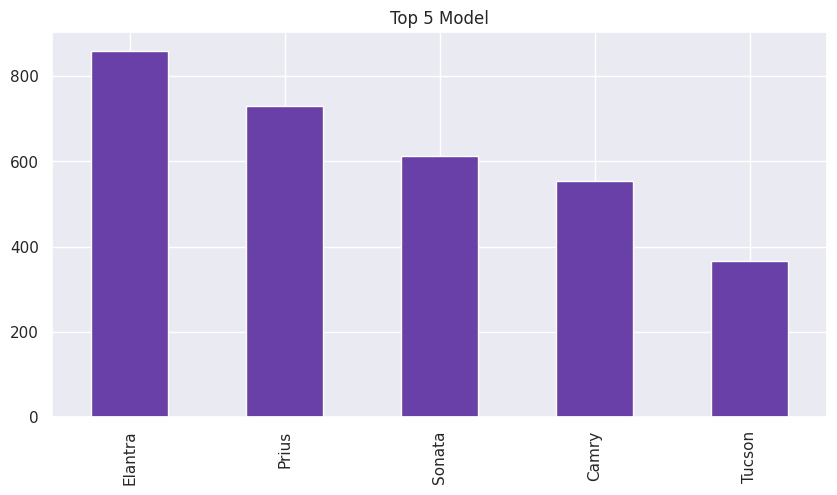

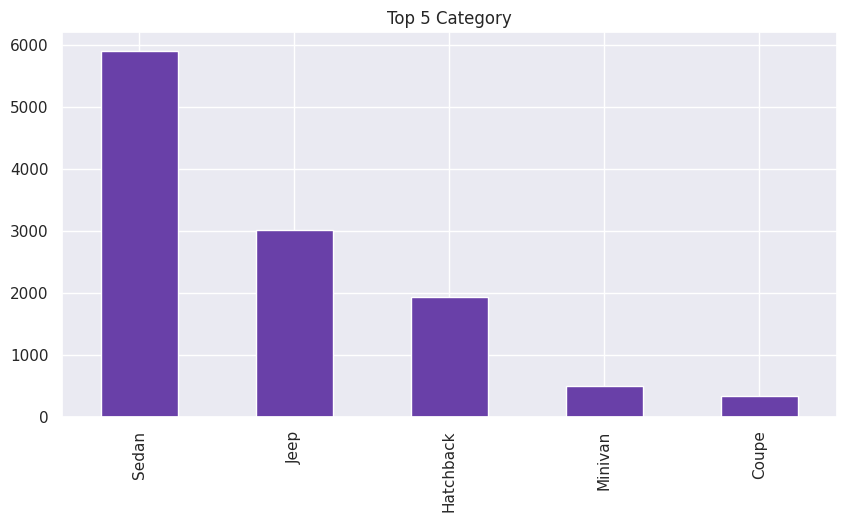

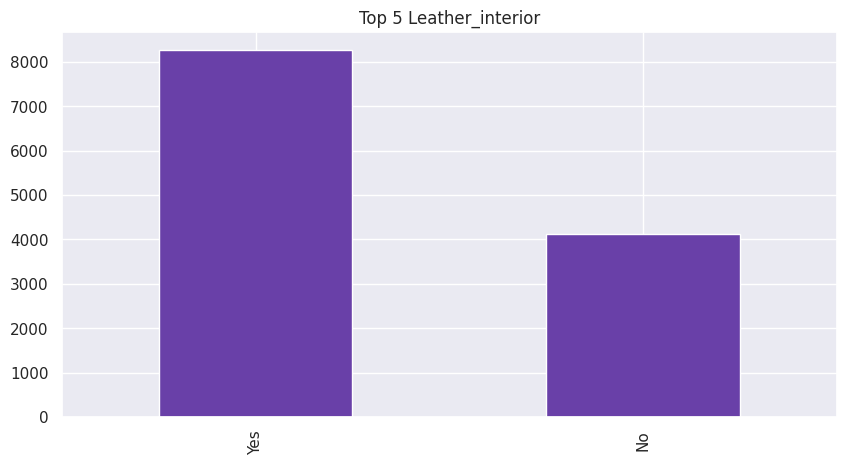

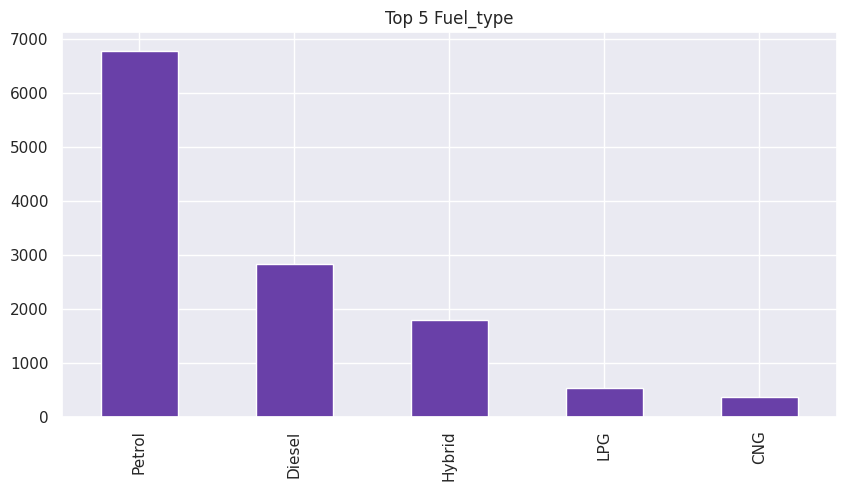

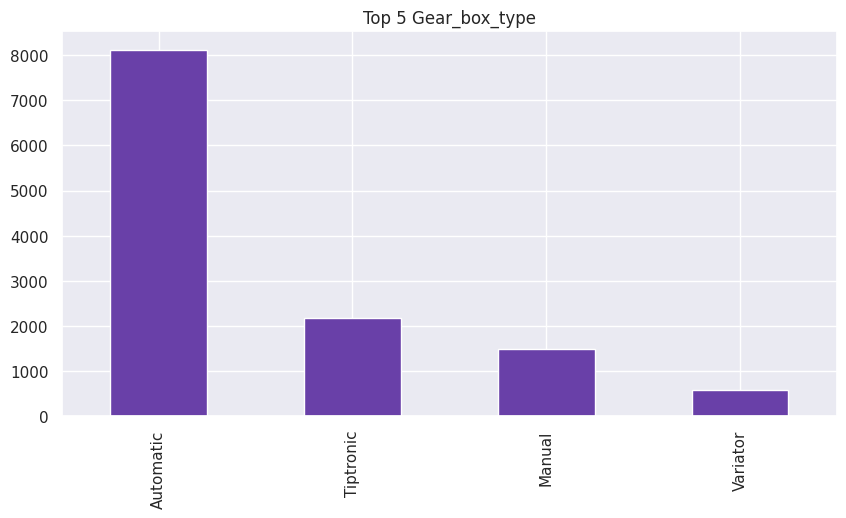

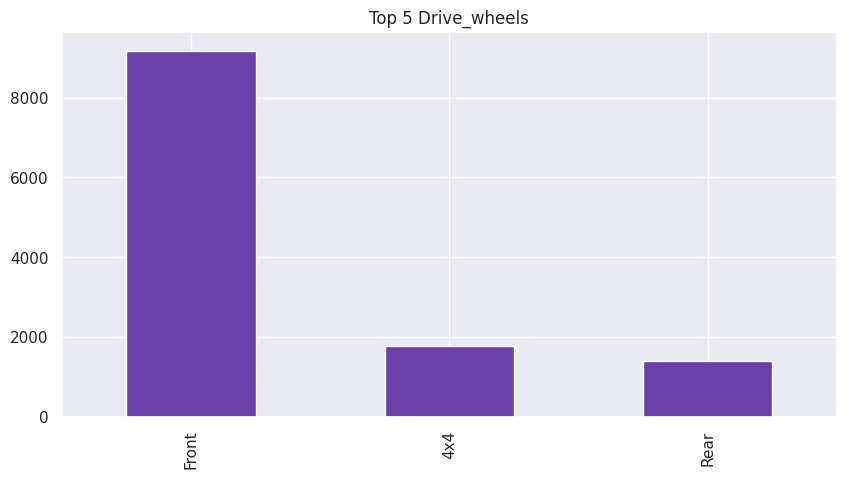

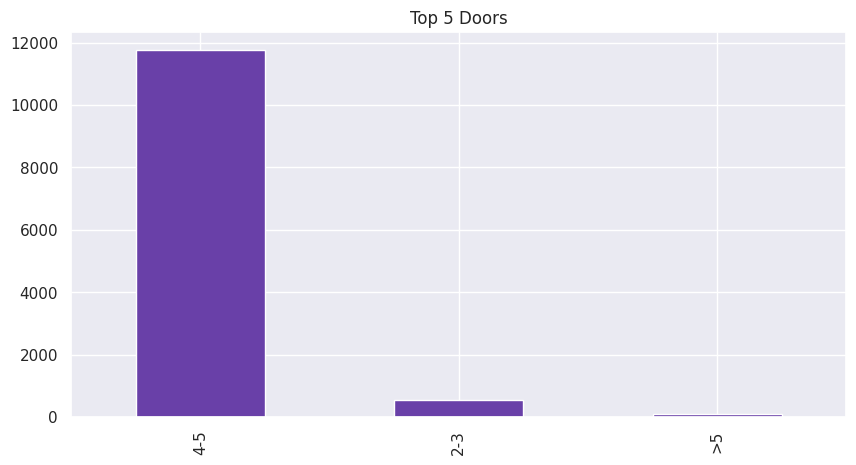

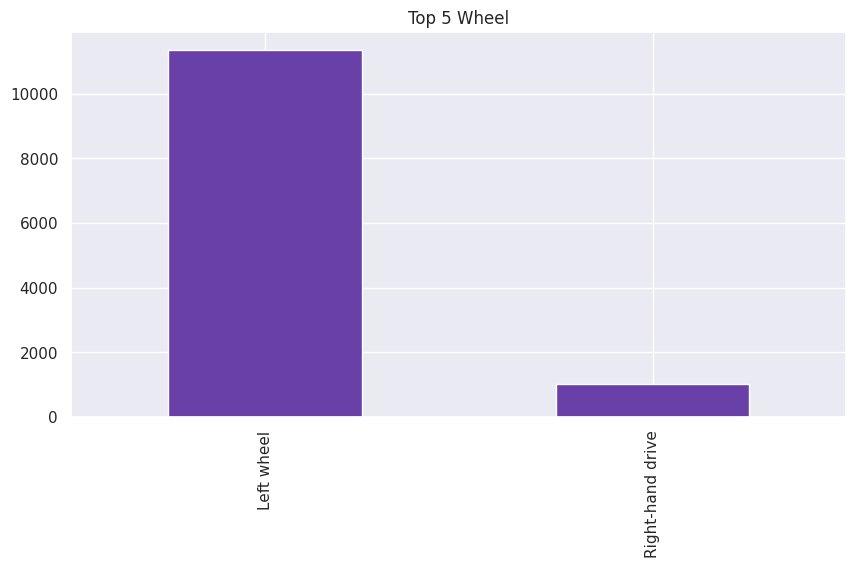

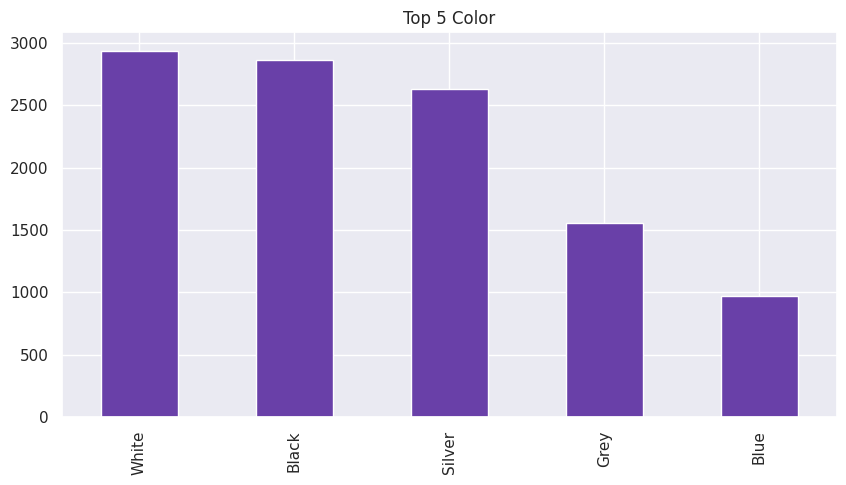

In [39]:
#Seleciconamos a todas las columnas que tengas tipo "objeto"

obj_col= df.select_dtypes(include="object")

#los gráficos de barras suelen funcionar mejor con datos cualitativos
for col in obj_col:
    plt.figure(figsize=(10,5))
    mejores=df[col].value_counts().head(5)
    mejores.plot(kind="bar", color='#6940A8')
    plt.title(f"Top 5 {col}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


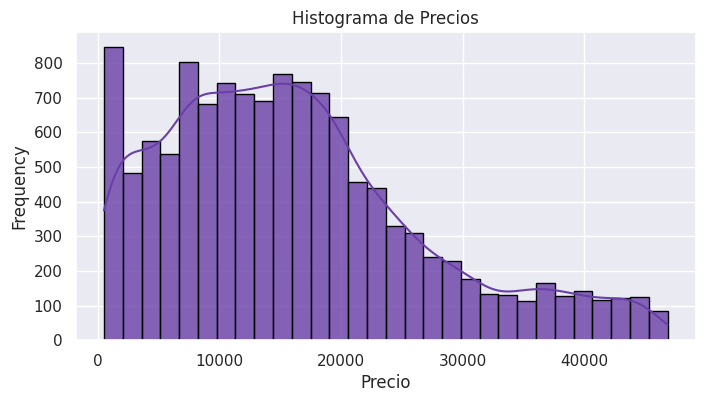

In [40]:
plt.figure(figsize=(8, 4))
# El kde es la línea que se ve y representa de forma suave la distribución de los datos.
sns.histplot(df['Price'], bins=30, color='#6940A8', edgecolor='black',alpha=0.8, kde=True)
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


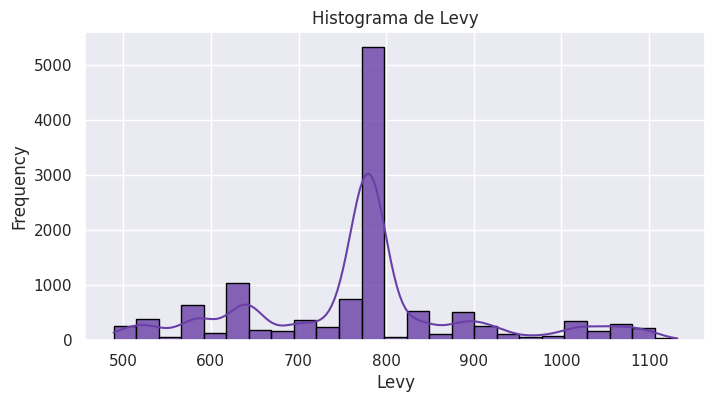

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Levy'], bins=25, color='#6940A8', edgecolor='black',alpha=0.8, kde=True)
plt.title('Histograma de Levy')
plt.xlabel('Levy')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


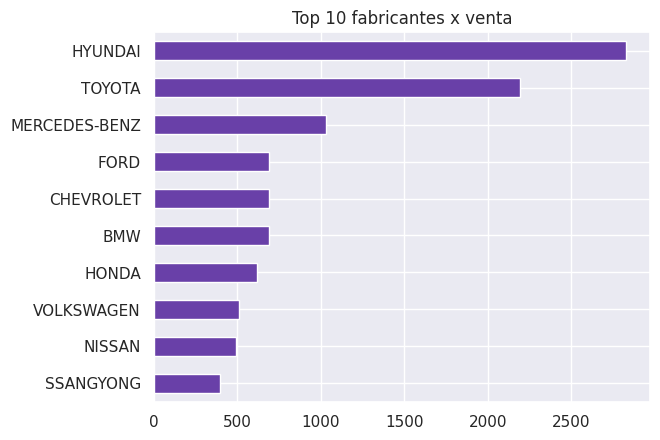

In [42]:
mejores_10_autos =df["Manufacturer"].value_counts().sort_values(ascending=True).tail(10)
plt.title('Top 10 fabricantes x venta')
mejores_10_autos.plot(kind="barh", color='#6940A8')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


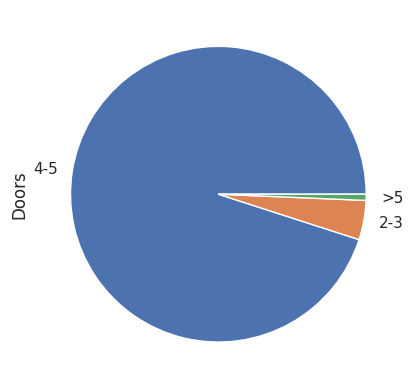

In [43]:
df['Doors'].value_counts().plot(kind='pie')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


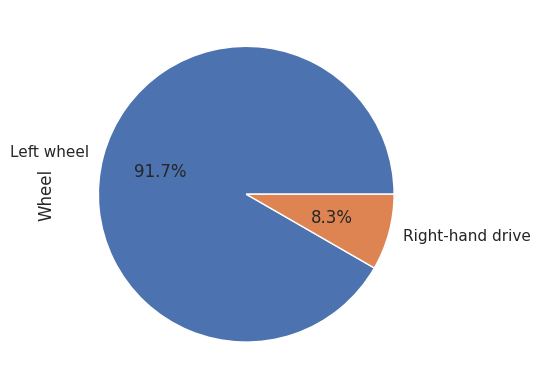

In [44]:
df["Wheel"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.show()

##Análisis visual de datos

In [45]:
promedio_preciosxaño = df.groupby('Prod_year')['Price'].mean().reset_index()
promedio_preciosxaño[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Prod_year,Price
0,1953,9440.5
1,1957,7527.0
2,1964,6585.5
3,1977,10340.5
4,1978,1300.0
5,1980,1925.0
6,1981,2800.0
7,1982,31361.0
8,1983,1300.0
9,1984,3881.5


In [46]:
promedio_preciosxmarca = df.groupby('Manufacturer')['Price'].mean().reset_index()
promedio_preciosxmarca = promedio_preciosxmarca.sort_values(by='Price', ascending=False)
promedio_preciosxmarca[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Manufacturer,Price
49,SSANGYONG,30353.431472
29,LINCOLN,29636.000000
24,JEEP,27083.055556
30,MASERATI,26813.500000
19,HUMMER,24618.000000
41,PORSCHE,23226.300000
23,JAGUAR,23050.000000
20,HYUNDAI,20739.048393
33,MERCURY,19757.000000
27,LAND ROVER,19171.250000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


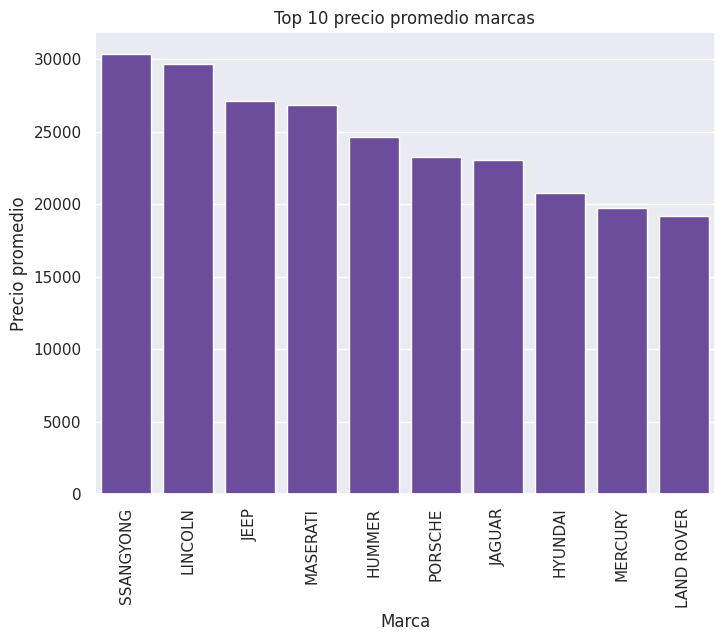

In [47]:
plt.figure(figsize=(8, 6))
#Uso de tail para mostrar los años más recientes
sns.barplot(x='Manufacturer', y='Price', data=promedio_preciosxmarca.head(10), color='#6940A8')
plt.title('Top 10 precio promedio marcas')
plt.xlabel('Marca')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)

plt.show()

In [48]:
contar_categorias = df['Category'].value_counts().reset_index()

contar_categorias.columns = ['Categoria', 'Cantidad']

print(contar_categorias)

      Categoria  Cantidad
0         Sedan      5910
1          Jeep      3015
2     Hatchback      1939
3       Minivan       506
4         Coupe       336
5     Universal       238
6      Microbus       204
7   Goods wagon       180
8        Pickup        25
9     Cabriolet        17
10    Limousine         3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


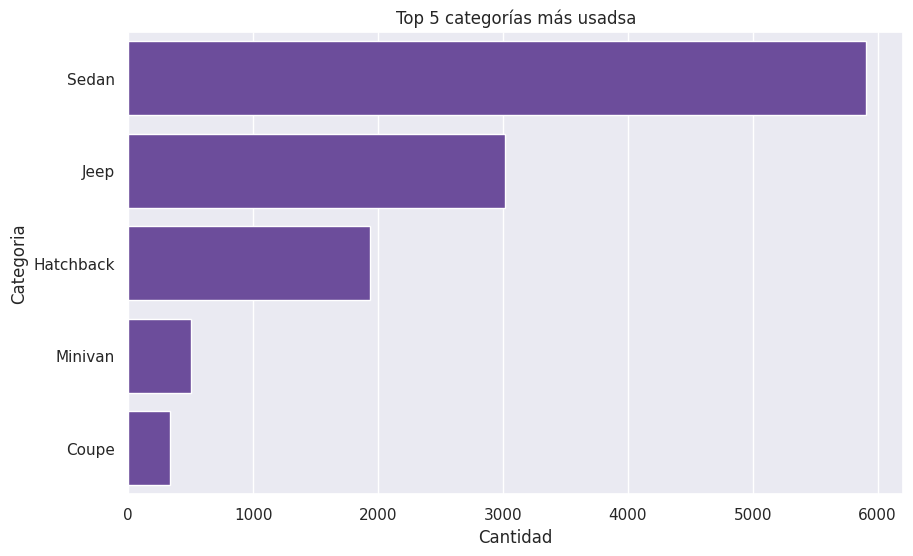

In [49]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cantidad', y='Categoria', data=contar_categorias.head(5),color='#6940A8')
plt.xlabel('Cantidad')
plt.ylabel('Categoria')
plt.title('Top 5 categorías más usadsa')
plt.show()

- Precio promedio por año
- precio promedio por marca
- Distribució por categoría de auto
- Distribución por gear type
- Distribución leather interior
- Distribución por manufacturador

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


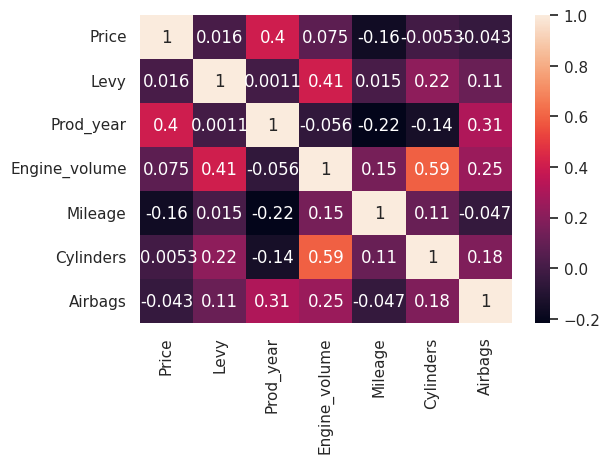

In [50]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])
matriz_corr = columnas_numericas.corr()


plt.figure(figsize=(6,4))

sns.heatmap(matriz_corr, annot=True)
plt.show()